<a href="https://colab.research.google.com/github/VerFabiola/DATA-MASTER-CHALLLENGE/blob/main/Cleaning_Data_Nuzhat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.impute import SimpleImputer

In [ ]:
df_electricity = pd.read_csv('electricity.csv',parse_dates=['timestamp'])


#df_electricity.head()
df_electricity.shape

(17544, 1579)

#DATA CLEANING
- Removing columns whose missing values represent more than 100%
- Adding columns : 'Building type', 'person_name', 'animal(building location)'
- Grouping building in the same location and type together

In [ ]:
# Find columns where all values are missing
fully_missing_cols = df_electricity.columns[df_electricity.isnull().all()].tolist()

print("Columns with all missing values:", fully_missing_cols)

Columns with all missing values: ['Rat_public_Ulysses', 'Eagle_lodging_Garland']


In [ ]:
print(df_electricity.columns)

Index(['timestamp', 'Panther_parking_Lorriane', 'Panther_lodging_Cora',
       'Panther_office_Hannah', 'Panther_lodging_Hattie',
       'Panther_education_Teofila', 'Panther_education_Jerome',
       'Panther_retail_Felix', 'Panther_parking_Asia',
       'Panther_education_Misty',
       ...
       'Cockatoo_public_Caleb', 'Cockatoo_education_Tyler',
       'Cockatoo_public_Shad', 'Mouse_health_Buddy', 'Mouse_health_Modesto',
       'Mouse_lodging_Vicente', 'Mouse_health_Justin', 'Mouse_health_Ileana',
       'Mouse_health_Estela', 'Mouse_science_Micheal'],
      dtype='object', length=1579)


In [ ]:
building_columns = [col for col in df_electricity.columns if col != 'timestamp']

# Make the buildings DataFrame
buildings = pd.DataFrame(building_columns, columns=['full_name'])

# Split the building name
buildings[['animal', 'building_type', 'person_name']] = buildings['full_name'].str.split('_', expand=True)

print(buildings.head())

                   full_name   animal building_type person_name
0   Panther_parking_Lorriane  Panther       parking    Lorriane
1       Panther_lodging_Cora  Panther       lodging        Cora
2      Panther_office_Hannah  Panther        office      Hannah
3     Panther_lodging_Hattie  Panther       lodging      Hattie
4  Panther_education_Teofila  Panther     education     Teofila


In [ ]:
# Group by building_type and save
for building_type in buildings['building_type'].unique():

    # Get the building columns for this building_type
    cols = buildings[buildings['building_type'] == building_type]['full_name'].tolist()

    # Include timestamp
    cols = ['timestamp'] + cols

    # Subset the main dataframe
    subset = df_electricity[cols]

    #print(f'\n=== Building Type: {building_type} ===')
    #print(f'Columns: {cols}')
    #print(subset.head())

In [ ]:
# Check missing values for each building type
missing_summary = {}

for building_type in buildings['building_type'].unique():
    # Get columns for this building_type
    cols = buildings[buildings['building_type'] == building_type]['full_name'].tolist()

    # Subset the dataframe
    subset = df_electricity[['timestamp'] + cols]

    # Calculate missing value %
    missing_percent = subset.isnull().mean() * 100

    # Save to dictionary
    missing_summary[building_type] = missing_percent

# Print missing value summaries
for building_type, missing in missing_summary.items():
    print(f'\nMissing Values in {building_type}:')
    print(missing)


Missing Values in parking:
timestamp                    0.000000
Panther_parking_Lorriane     0.062699
Panther_parking_Asia         0.062699
Panther_parking_Alaina       0.068399
Panther_parking_Mellissa     0.062699
Panther_parking_Charlene     0.068399
Panther_parking_Stanley      0.068399
Panther_parking_Adela        0.062699
Panther_parking_Jody         0.262198
Fox_parking_Tommie           0.017100
Fox_parking_Lynelle          0.011400
Fox_parking_Felipa           0.011400
Rat_parking_Ronnie           0.296398
Bear_parking_Bridget        33.048336
Bear_parking_Bruce           0.752394
Bear_parking_Gordon          0.256498
Hog_parking_Antoinette       0.000000
Hog_parking_Joan             0.182399
Hog_parking_Marcus           0.017100
Hog_parking_Bernardo         0.005700
Hog_parking_Jean             0.000000
Hog_parking_Cliff            0.222298
Hog_parking_Jeana            0.005700
Hog_parking_Shannon          0.000000
dtype: float64

Missing Values in lodging:
timestamp        

In [ ]:
missing_df = pd.DataFrame(missing_summary)
missing_df.head()

,parking,lodging,office,education,retail,assembly,other,public,warehouse,food,utility,health,religion,science,industrial,services,unknown
Bear_assembly_Angel,NaN,NaN,NaN,NaN,NaN,17.721158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_assembly_Beatrice,NaN,NaN,NaN,NaN,NaN,0.222298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_assembly_Danial,NaN,NaN,NaN,NaN,NaN,30.534656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_assembly_Diana,NaN,NaN,NaN,NaN,NaN,12.904697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_assembly_Genia,NaN,NaN,NaN,NaN,NaN,0.951892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


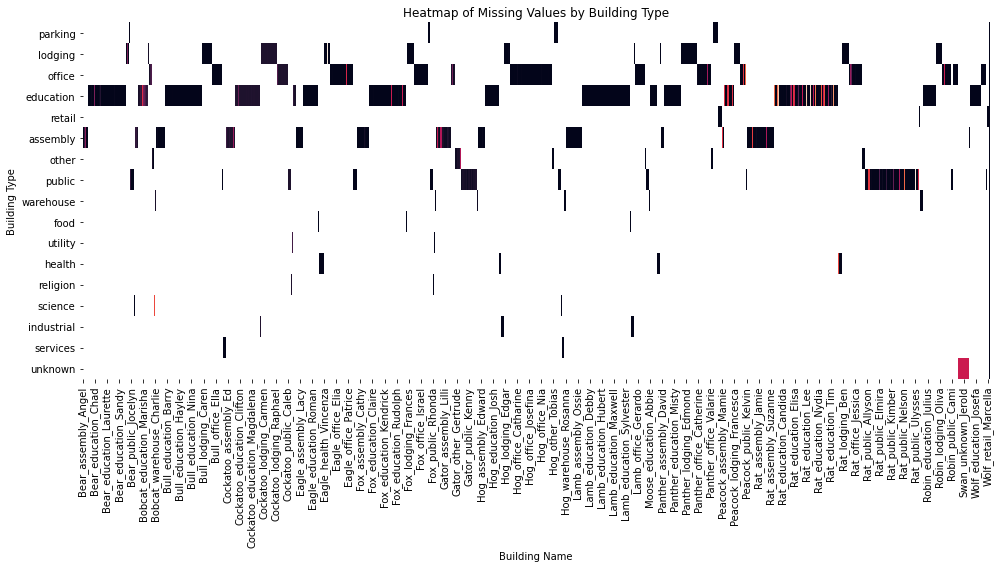

In [ ]:
# Convert missing_summary into a DataFrame
missing_df = pd.DataFrame(missing_summary)

# 3. Transpose so that building_type are rows
missing_df = missing_df.T

# 4. Plot the heatmap
plt.figure(figsize=(14, 8))
#sns.heatmap(missing_df, cmap='coolwarm', cbar_kws={'label': '% Missing'}, linewidths=0.5)
sns.heatmap(missing_df, cbar=False, cbar_kws={'label': '% Missing'})
plt.title('Heatmap of Missing Values by Building Type')
plt.xlabel('Building Name')
plt.ylabel('Building Type')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Load dataset
#df_electricity = pd.read_csv('electricity.csv',na_values=['unknown'])
df = pd.read_csv('model_ready_energy_data.csv',parse_dates=['timestamp'])


df.head()
#df.shape

#print(df_electricity.info())

,timestamp,hour,dayofweek,season,subgroup,maingroup,avg_electricity
0,2016-01-01 00:00:00,0,4,winter,parking_Bear,parking,0.383481
1,2016-01-01 01:00:00,1,4,winter,parking_Bear,parking,0.477194
2,2016-01-01 02:00:00,2,4,winter,parking_Bear,parking,0.517381
3,2016-01-01 03:00:00,3,4,winter,parking_Bear,parking,0.448333
4,2016-01-01 04:00:00,4,4,winter,parking_Bear,parking,0.329818


In [ ]:
df.isnull().sum()

timestamp              0
hour                   0
dayofweek              0
season                 0
subgroup               0
maingroup              0
avg_electricity    54749
dtype: int64

<Axes: >

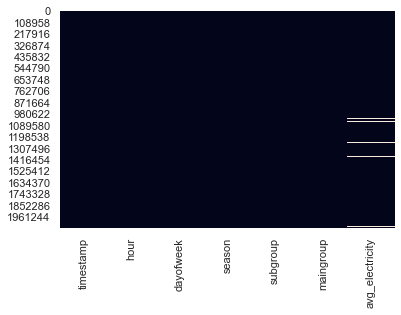

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(df.isnull(), cbar=False)

#FILLING MISSING AVERAGE ELCTRICITY VALUES USING KNN


In [ ]:
from sklearn.impute import KNNImputer
# Initialize KNNImputer with 5 neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation only on the 'avg_electricity' column
df_imputed = df.copy()  # Make a copy to avoid modifying original DataFrame
df_imputed[['avg_electricity']] = knn_imputer.fit_transform(df[['avg_electricity']])


# Display the imputed dataframe
print(df_imputed)


                  timestamp  hour  dayofweek  season      subgroup maingroup  \
0       2016-01-01 00:00:00     0          4  winter  parking_Bear   parking   
1       2016-01-01 01:00:00     1          4  winter  parking_Bear   parking   
2       2016-01-01 02:00:00     2          4  winter  parking_Bear   parking   
3       2016-01-01 03:00:00     3          4  winter  parking_Bear   parking   
4       2016-01-01 04:00:00     4          4  winter  parking_Bear   parking   
...                     ...   ...        ...     ...           ...       ...   
2070187 2017-12-31 19:00:00    19          6  winter  unknown_Swan   unknown   
2070188 2017-12-31 20:00:00    20          6  winter  unknown_Swan   unknown   
2070189 2017-12-31 21:00:00    21          6  winter  unknown_Swan   unknown   
2070190 2017-12-31 22:00:00    22          6  winter  unknown_Swan   unknown   
2070191 2017-12-31 23:00:00    23          6  winter  unknown_Swan   unknown   

         avg_electricity  
0           

<Axes: >

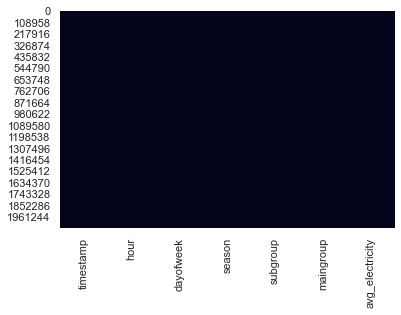

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(df_imputed.isnull(), cbar=False)